In [244]:
from pandas_datareader import data as pdr
import yfinance as yfin
import numpy as np #manipulação de matrizes/ álgebra linear
import pandas as pd #manipulação de dataframes
from datetime import datetime,timedelta #datas
import numpy.matlib
import matplotlib.pyplot as plt #imagens
import plotly.express as px #imagens interativas
import plotly.graph_objects as go
import pandas_datareader.data as web #importar dados históricos de ativos
import scipy.io #estatística
from scipy.optimize import linprog #algoritmo para otimização linear
from time import sleep 
from tqdm.notebook import tqdm #avaliar passar em um loop


yfin.pdr_override()
pd.set_option('display.max_columns', 500)

In [238]:
df = pd.read_csv('s3://bbs-datalake/SourceZone/stock_info/2024-01-22/df_stocks_info.csv')

col_str = ['Nome', 'Códigos', 'Bolsa', 'Setor', 'Indústria', '15 minutos', 'Hora', 'Diário', 'Semanal', 'Mensal']
for coluna in df.columns:
    if coluna not in col_str:
        if df[coluna].dtype == 'O':  # Verifica se a coluna é do tipo objeto (string)
            df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
Tipos_depara = {'34':'BDR', '11':'FII', '3':'ON', '4':'PN', '5':'PNA', '6':'PNB', '31': 'BDR', 
                '12':'Subscrição', '33':'BDR', '32':'BDR', '35':'BDR', '7': 'PNC', '8': 'PND'} 
df['Tipo'] = df['Códigos'].str[4:].replace(to_replace='[^0-9]', value='', regex=True).replace(Tipos_depara)

In [239]:
df

,Nome,Códigos,Bolsa,Setor,Indústria,Último,Var%,Capitalização,Vol.,Relação P/L,"MACD (12,26 / 1D)",Receita,Volume Médio (3m),LPA,Beta,Dividendo,Rendimento,15 minutos,Hora,Diário,Semanal,Mensal,Diário.1,Semana,Mês,YTD,1 ano,3 anos,Variação em 1 ano,Retorno com dividendos (%),Índice P/L (TTM),Índice Preço/Vendas (TTM),Índice Preço/Fluxo de Caixa (MRQ),Índice de Preço/Fluxo de Caixa Livre (TTM),Índice Preço/Valor Contábil (MRQ),Índice Preço/Valor Contábil Tangível (MRQ),LPA (MRQ) vs Trim. do ano Anterior,LPA (TTM) vs TTM do ano Anterior,Crescimento do LPA em 5 anos,Vendas (MRQ) vs Trim. do ano Anterior,Vendas (TTM) vs TTM do ano Anterior (TTM),Crescimento de Vendas em 5 anos,Crescimento de Despesas de Capital em 5 anos,Giro do Ativo (TTM),Giro do Estoque (TTM),Receita/Empregado (TTM),Lucro Líquido/Empregado (TTM),Giro de Contas a Receber (TTM),Var. 52 semanas - Máxima,Var. 52 semanas - Mínima,% variação da alta de 52 sem.,% variação da baixa de 52 sem.,Variação (%) no mês anterior,Margem Bruta (TTM),Margem Bruta (5YA),Margem Operacional (TTM),Margem Operacional (5YA),Margem antes de Impostos (TTM),Margem antes de Impostos (5YA),Margem Líquida (TTM),Margem Líquida (5YA),Liquidez Seca (MRQ),Liquidez Corrente (MRQ),Dívida de longo prazo em Capital (MRQ),Dívida Total em Capital,Dividend Yield Médio em 5 anos (5YA),Taxa de Crescimento do Dividendo (ANN),Índice de Payout (TTM),ADX (14 / 1D),ATR (14 / 1D),Bull/Bear Power (13 / 1D),CCI (14 / 1D),Highs/Lows (14 / 1D),ROC (1D),RSI (14 / 1D),STOCH (14 / 1D),STOCHRSI (14 / 1D),Ultimate Oscillator (14 /1D),Williams %R (1D),Tipo
0,Microsoft BDR,MSFT34,B3,Tecnologia,Serviços de software e TI,81.81,1.04,NaN,117446.0,38.35,1.32,NaN,119217.0,10.36,0.897,0.4132,NaN,Compra Forte,Compra Forte,Compra Forte,Compra Forte,Compra Forte,1.04,4.62,7.97,8.07,56.63,60.26,NaN,0.51,38.43,13.57,30.35,46.86,13.42,20.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,1832.0,NaN,NaN,528.0,81.81,49.18,0.00,66.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.45,1.66,NaN,NaN,NaN,NaN,NaN,44.442,1.2743,5.224,147.5314,3.4400,8.071,75.877,75.958,100.000,64.782,0.000,BDR
1,Apple BDR,AAPL34,B3,Tecnologia,"Computadores, telefones e eletrodomésticos",47.28,2.07,NaN,93807.0,31.11,-0.11,NaN,145455.0,6.16,1.310,0.1586,NaN,Compra Forte,Compra Forte,Compra Forte,Compra Forte,Compra Forte,2.07,5.25,0.60,1.00,32.51,25.28,NaN,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.00,35.25,-3.51,34.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.201,0.8357,1.860,240.7240,1.6979,1.004,60.680,49.930,100.000,66.632,-0.300,BDR
2,Alphabet A BDR,GOGL34,B3,Tecnologia,Serviços de software e TI,60.04,1.49,NaN,110466.0,25.31,0.98,NaN,115086.0,5.24,1.050,NaN,NaN,Compra Forte,Compra Forte,Compra Forte,Compra Forte,Compra Forte,1.49,4.16,4.89,6.66,41.90,38.50,NaN,NaN,27.46,6.17,12.34,23.61,6.71,7.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,4266.0,NaN,NaN,769.0,60.18,38.33,-0.23,56.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,2.04,NaN,NaN,NaN,NaN,NaN,33.377,1.2364,3.690,174.5303,2.0693,6.662,68.502,66.391,100.000,58.572,-2.672,BDR
3,Alphabet C BDR,GOGL35,B3,Tecnologia,Serviços de software e TI,60.55,1.66,NaN,326.0,25.31,0.98,NaN,8528.0,5.24,1.050,NaN,NaN,Compra Forte,Compra Forte,Compra Forte,Compra Forte,Compra Forte,1.66,3.89,4.87,6.71,41.60,39.07,NaN,NaN,27.59,6.20,12.34,23.72,6.74,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,4266.0,NaN,NaN,769.0,60.74,38.45,-0.31,57.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.87,2.04,NaN,NaN,NaN,NaN,NaN,40.882,1.2050,3.598,167.6900,1.9529,6.715,69.415,64.846,100.000,50.196,-3.607,BDR
4,Amazon.com BDR,AMZO34,B3,Consumo cíclico,Varejo diversificado,38.39,1.75,NaN,192953.0,79.43,0.50,NaN,210254.0,1.96,1.180,NaN,NaN,Compra Forte,Compra Forte,Compra Forte,Compra Forte,Compra Forte,1.75,2.59,2.65,3.34,51.14,-14.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.42,23.15,-0.08,65.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.709,0.6964,1.264,113.2742,1.01

In [248]:
recomendacao = 'Compra Forte'
tipo = 'ON'
df_filter = df.query('Mensal == @recomendacao and Tipo == @tipo')
stocks_codes = [i + ".SA" for i in df_filter.Códigos.unique()]

In [249]:
stocks_codes

['PETR3.SA',
 'ITUB3.SA',
 'BPAC3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'SANB3.SA',
 'ITSA3.SA',
 'ELET3.SA',
 'VIVT3.SA',
 'B3SA3.SA',
 'BBSE3.SA',
 'SUZB3.SA',
 'JBSS3.SA',
 'SBSP3.SA',
 'RADL3.SA',
 'TIMS3.SA',
 'CPFE3.SA',
 'RAIL3.SA',
 'CXSE3.SA',
 'EQTL3.SA',
 'PRIO3.SA',
 'CMIN3.SA',
 'CSAN3.SA',
 'UGPA3.SA',
 'CPLE3.SA',
 'CCRO3.SA',
 'VBBR3.SA',
 'ENGI3.SA',
 'CSNA3.SA',
 'TRPL3.SA',
 'TOTS3.SA',
 'NEOE3.SA',
 'PSSA3.SA',
 'EQPA3.SA',
 'MULT3.SA',
 'EMBR3.SA',
 'GMAT3.SA',
 'ENMT3.SA',
 'SMFT3.SA',
 'REDE3.SA',
 'ALOS3.SA',
 '1ALOS3.SA',
 'MDIA3.SA',
 'TAEE3.SA',
 'GGPS3.SA',
 'CEEB3.SA',
 'BNBR3.SA',
 'ALUP3.SA',
 'MRFG3.SA',
 'SAPR3.SA',
 'CSMG3.SA',
 'STBP3.SA',
 'CYRE3.SA',
 'VIVA3.SA',
 'PORT3.SA',
 'ODPV3.SA',
 'ECOR3.SA',
 'POMO3.SA',
 'GRND3.SA',
 'YDUQ3.SA',
 'ONCO3.SA',
 'BRSR3.SA',
 'CURY3.SA',
 'ARML3.SA',
 'BAZA3.SA',
 'ENAT3.SA',
 'EQMA3B.SA',
 'VULC3.SA',
 'CSRN3.SA',
 'FESA3.SA',
 'FRAS3.SA',
 'RAPT3.SA',
 'DIRR3.SA',
 'IGTI3.SA',
 'JSLG3.SA',
 'MILS3.SA',
 'BEES3.SA

In [250]:
start = datetime(2023,1,1)
end = datetime(2023,12,10)
historico_stocks = web.DataReader(stocks_codes, start, end)['Adj Close']

[*********************100%%**********************]  129 of 129 completed


2 Failed downloads:
['1ALOS3.SA', '1WIZC3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [251]:
#colunas que contém nan
colunas_nan = list(historico_stocks.iloc[:,list(historico_stocks.isna().any())].columns)
if colunas_nan!=[]:
    print(f'Os ativos {colunas_nan} contém dados faltantes, e portante não devem ser utilizadas no portfólio')
    historico_stocks = historico_stocks.drop(columns=colunas_nan)
    stocks = list(historico_stocks.columns)
else:
    stocks = list(historico_stocks.columns)

Os ativos ['1ALOS3.SA', '1WIZC3.SA', 'ALOS3.SA', 'BGIP3.SA', 'BMEB3.SA', 'BMKS3.SA', 'BNBR3.SA', 'BRGE3.SA', 'CALI3.SA', 'CEDO3.SA', 'CEEB3.SA', 'CRIV3.SA', 'EALT3.SA', 'ENMT3.SA', 'EQMA3B.SA', 'FESA3.SA', 'FRIO3.SA', 'GEPA3.SA', 'LIPR3.SA', 'MAPT3.SA', 'PINE3.SA', 'RPAD3.SA', 'SNSY3.SA'] contém dados faltantes, e portante não devem ser utilizadas no portfólio


In [252]:
data = historico_stocks.values.transpose()
Returns = np.zeros((data.shape[1]-1,data.shape[0]))
for i in range(Returns.shape[1]):
    Returns[:,i] = np.log(data[i,1::]/data[i,0:-1])+1

In [253]:
Returns_df = pd.DataFrame(Returns)
Returns_df.columns = historico_stocks.columns

N = Returns_df.shape[1]
weights = [1/N]*N
weights_dict = dict(zip(Returns_df.columns, weights))

In [254]:
from __future__ import annotations
from typing import TypeVar, Tuple, Type
from abc import ABC, abstractmethod

T = TypeVar('T', bound='Chromossome')

class Chromossome(ABC):
    '''
    Classe abstrata que representa um cromossomo genético.
    '''

    # Retorna o valor da aptidão do cromossomo.
    @abstractmethod
    def fitness(self) -> float:
        ...

    # Realiza o cruzamento entre dois cromossomos.
    @classmethod
    def crossover(self: T, other: T) -> Tuple[T,T]:
        ...

    # Realiza a mutação do cromossomo.
    @classmethod
    def mutate(self) -> None:
        ...

    # Gera um cromossomo aleatório.
    @classmethod
    def random_instance(cls: Type[T]) -> T:
        ...

In [280]:
from random import choices, random, uniform


class Portfolio(Chromossome):
    """
    Classe que representa um portfólio de ativos.
    """

    def __init__(self, weights: dict, returns: pd.DataFrame, risco: float = 0.2) -> None:
        self._weights = weights  # dicionário com os pesos dos ativos
        self.returns = returns  # retornos de cada ativo
        self.risco = risco  # taxa de risco

    @property
    def weights(self) -> dict:
        """
        Retorna um dicionário com os pesos dos ativos.
        Returns
        -------
        dict
            Dicionário com os pesos dos ativos.
        """
        total = sum(self._weights.values())
        if total == 0:
            raise ValueError(
                "A soma dos valores no dicionário é zero. Não é possível normalizar."
            )

        normalized_weight = {key: value / total for key, value in self._weights.items()}

        return normalized_weight

    def fitness(self, alpha=0.95) -> float:
        """
        Retprna a medida de risco a de aptidão do portfólio.
        Parameters
        ----------

        alpha : float, optional
            Taxa de significância, por padrão 0.95.
        Returns
        -------
        float
            Aptidão do portfólio.
        """
        weights_array = np.array(list(self.weights.values()))
        mean_return = self.returns.mean()
        portfolio_returns = self.returns.dot(weights_array)
        portfolio_var = np.percentile(portfolio_returns, alpha * 100)
        self.cvar = portfolio_returns[portfolio_returns <= portfolio_var].mean()
        return (1 - self.risco) * mean_return.dot(weights_array) - self.risco * self.cvar

    def crossover(self: T, other: T) -> Tuple[T, T]:
        """
        Realiza o crossover entre dois portfólios.
        Parameters
        ----------
        other : T
            Portfólio a ser crossoverado.
        Returns
        -------
        Tuple[T,T]
            Dois novos portfólios resultantes do crossover.
        """
        # Obter pesos dos portfólios atuais e do outro portfólio a ser crossoverado.
        w1 = self.weights
        w2 = other.weights

        meio = len(w1) // 2

        # Criar novos dicionários resultantes do crossover
        novo_w1 = {k: w1[k] for k in list(w1.keys())[:meio]}  # Primeira metade de w1
        novo_w1.update(
            {k: w2[k] for k in list(w2.keys())[meio:]}
        )  # Adicionar segunda metade de w2

        novo_w2 = {k: w2[k] for k in list(w2.keys())[:meio]}  # Primeira metade de w2
        novo_w2.update(
            {k: w1[k] for k in list(w1.keys())[meio:]}
        )  # Adicionar segunda metade de w1

        child1 = Portfolio(weights=novo_w1, returns=self.returns)
        child2 = Portfolio(weights=novo_w2, returns=self.returns)

        return child1, child2

    def mutate(self, rate=0.2) -> None:
        """
        Realiza a mutação no portfólio.
        Parameters
        ----------
        rate : float, optional
            Taxa de mutação, por padrão 0.2.
        """
        # Realizar mutação em cada ponto de peso do portfólio.'''
        for key in self._weights:
            if random() < rate:
                self._weights[key] += max(0, uniform(-0.1, 0.1))

    @classmethod
    def random_instance(cls, weights, returns) -> Portfolio:
        """
        Cria um portfólio aleatório com pesos e retornos aleatórios.
        Returns
        -------
        Portfolio
            Portfólio aleatório.
        """
        # Gerar pesos aleatórios e retornos aleatórios para os ativos. '''
        random_weights = {key: uniform(0, 1) for key in weights}
        return Portfolio(weights=random_weights, returns=returns)

    def __repr__(self) -> str:
        return f"Portfolio(weights={self.weights}, returns={self.returns})"

In [305]:
from __future__ import annotations
from typing import TypeVar, Generic, List, Tuple, Callable
from enum import Enum
from random import choices, random, uniform
from heapq import nlargest
from statistics import mean
import matplotlib.pyplot as plt

C = TypeVar("C", bound="Chromossome")


class GeneticAlgoritm(Generic[C]):
    SelectionType = Enum("SelectionType", "ROULETTE TOURNAMENT")

    def __init__(
        self,
        initial_population: List[C],
        threshold: float,
        max_generations: int = 100,
        mutation_chance: float = 0.1,
        crossover_chance: float = 0.7,
        selection_type: SelectionType = SelectionType.ROULETTE,
    ) -> None:
        self._population: list[C] = initial_population  # população inicial
        self._threshold: float = threshold  # limite de fitness para parar o algoritmo
        self._max_generations: int = (
            max_generations  # número máximo de gerações do algoritmo
        )
        self._mutation_chance: float = (
            mutation_chance  # chance de mutação dos cromossomos
        )
        self._crossover_chance: float = (
            crossover_chance  # chance de crossover dos cromossomos
        )
        self._selection_type: GeneticAlgoritm.SelectionType = (
            selection_type  # tipo de seleção
        )
        self._crossover_chance: float = (
            crossover_chance  # chance de crossover dos cromossomos
        )
        self._fitness_key: Callable = type(
            self._population[0]
        ).fitness  # chave para ordenar a população

    # executa o algoritmo de seleção via roleta
    def _pick_roulette(self, wheel: List[float]) -> Tuple[C, C]:
        return tuple(choices(self._population, wheel, k=2))

    # eexecuta o algoritmo de seleção via torneio
    def _pick_tournament(self, num_competitors: int) -> Tuple[C, C]:
        participants = choices(self._population, k=num_competitors)
        return nlargest(2, participants, key=self._fitness_key)

    # executa o algoritmo genético até que a condição de parada seja atingida
    def _reproduce_and_replace(self) -> None:
        new_population: List[C] = []
        # continua até que a população seja cheia
        while len(new_population) < len(self._population):
            if self._selection_type == self.SelectionType.ROULETTE:
                parents: Tuple[C, C] = self._pick_roulette(
                    [x.fitness() for x in self._population]
                )
            else:
                parents = self._pick_tournament(len(self._population) // 2)
            # faz o crossover dos dois pais
            if random() < self._crossover_chance:
                new_population.extend(parents[0].crossover(parents[1]))
            else:
                new_population.extend(parents)
        if len(new_population) > len(self._population):
            new_population.pop()
        self._population = new_population  # substitui a população pela nova

    # executa o algoritmo genético até que a condição de parada seja atingida
    def _mutate(self) -> None:
        for individual in self._population:
            if random() < self._mutation_chance:
                individual.mutate()

    def run(self) -> C:
        best: C = max(self._population, key=self._fitness_key)
        gens = []
        bests_fitness = []
        means_gen_fitness = []
        for generation in range(self._max_generations):
            if best.fitness() >= self._threshold:
                return best
            best_fitness = best.fitness()
            mean_gen_fitness = mean(map(self._fitness_key, self._population))
            gens.append(generation)
            bests_fitness.append(best_fitness)
            means_gen_fitness.append(mean_gen_fitness)
            print(f"Generation {generation}: {best_fitness} Avg {mean_gen_fitness}")
            self._reproduce_and_replace()
            self._mutate()
            highest: C = max(self._population, key=self._fitness_key)
            if highest.fitness() >= best.fitness():
                best = highest  # encontra o melhor indivíduo da geração
        self.results = pd.DataFrame(
            {
                "Generation": gens,
                "Best Fitness": bests_fitness,
                "Avg Fitness": means_gen_fitness,
            }
        )
        return best  # retorna o melhor indivíduo da população

    def plot_results(self):
        self.results.plot(x="Generation", y=["Best Fitness", "Avg Fitness"])
        plt.title("Results")
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.show()
        return self.results

In [275]:
p = Portfolio(weights = weights_dict, returns = Returns_df)

In [258]:
initial_population = [p.random_instance(weights_dict, Returns_df) for _ in range(20)]


In [263]:

ga = GeneticAlgoritm(initial_population, threshold = 13.0, max_generations = 100, mutation_chance = 0.7, crossover_chance = 0.7)

ga.run()


Generation 0: 0.6013553094378915 Avg 0.6012874164450072
Generation 1: 0.6015593870710166 Avg 0.6013555206012371
Generation 2: 0.6016909571787661 Avg 0.6014635425652127
Generation 3: 0.6016909571787661 Avg 0.6015598978139095
Generation 4: 0.6017090260600431 Avg 0.6015335881937992
Generation 5: 0.6017168371105309 Avg 0.6015530988532518
Generation 6: 0.6017557582645402 Avg 0.6015922809703584
Generation 7: 0.6018405428036886 Avg 0.601579770059447
Generation 8: 0.6018405428036886 Avg 0.6016194495493676
Generation 9: 0.6018719833549625 Avg 0.6016758916547759
Generation 10: 0.6018719833549626 Avg 0.6016844777329773
Generation 11: 0.601836195245675 Avg 0.6016623820905043
Generation 12: 0.6019154430262647 Avg 0.6016790272978767
Generation 13: 0.6019154430262647 Avg 0.6017018612344129
Generation 14: 0.6019831096104633 Avg 0.6017198147941999
Generation 15: 0.6018968264180252 Avg 0.6017093670267221
Generation 16: 0.6019172354314878 Avg 0.6017252193184868
Generation 17: 0.601964605767618 Avg 0.6017

Portfolio(weights={'ALPK3.SA': 0.057380084762195235, 'ALUP3.SA': 2.0871851912143487e-05, 'APER3.SA': 0.0312708720277381, 'ARML3.SA': 0.05243634475496637, 'B3SA3.SA': 1.96876231470387e-05, 'BAZA3.SA': 0.04724476569796811, 'BBAS3.SA': 0.0015556084705610458, 'BBDC3.SA': 0.00020447617025573295, 'BBSE3.SA': 0.0053107004764293515, 'BEES3.SA': 0.0014725087739203874, 'BPAC3.SA': 0.00012121293842518182, 'BRIV3.SA': 0.00033388770298724144, 'BRSR3.SA': 0.018338050239498797, 'CAMB3.SA': 0.010439714206187637, 'CAML3.SA': 0.0007283807715670339, 'CCRO3.SA': 0.0016733190510635032, 'CEAB3.SA': 0.015818038449679828, 'CEBR3.SA': 0.005645269010174213, 'CLSC3.SA': 0.0038945111984039177, 'CMIN3.SA': 0.0007605280648224749, 'CPFE3.SA': 1.177255356010727e-06, 'CPLE3.SA': 1.2158336121137379e-05, 'CSAN3.SA': 2.3380645119978914e-05, 'CSED3.SA': 0.0017397748111533417, 'CSMG3.SA': 0.0004510581091294372, 'CSNA3.SA': 0.006826279317534298, 'CSRN3.SA': 9.149359414689506e-06, 'CSUD3.SA': 0.0003414633098734718, 'CURY3.SA

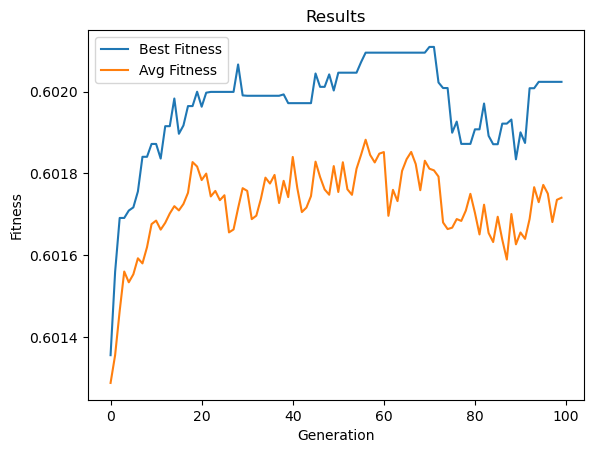

,Generation,Best Fitness,Avg Fitness
0,0,0.601355,0.601287
1,1,0.601559,0.601356
2,2,0.601691,0.601464
3,3,0.601691,0.601560
4,4,0.601709,0.601534
...,...,...,...
95,95,0.602024,0.601772
96,96,0.602024,0.601750
97,97,0.602024,0.601681
98,98,0.602024,0.601735


In [265]:
ga.plot_results()

In [306]:
ga_list = []
for i in np.arange(0,1,.1):
    p = Portfolio(weights_dict, Returns_df, risco = i)
    initial_population = [p.random_instance(weights_dict, Returns_df) for _ in range(20)]
    ga = GeneticAlgoritm(initial_population, threshold = 13.0, max_generations = 20, mutation_chance = 0.1, crossover_chance = 0.6)

    ga_list.append(ga.run())

Generation 0: 0.6013872007611617 Avg 0.6012987085383065
Generation 1: 0.601441682853379 Avg 0.6013113051627063
Generation 2: 0.601441682853379 Avg 0.601306951498552
Generation 3: 0.6015389663138617 Avg 0.6013127416161939
Generation 4: 0.6015389663138617 Avg 0.6013266210942022
Generation 5: 0.6015389663138617 Avg 0.601349195791862
Generation 6: 0.6015389663138617 Avg 0.6013530418765984
Generation 7: 0.6015389663138617 Avg 0.6013103955592256
Generation 8: 0.6015389663138617 Avg 0.6013107220108538
Generation 9: 0.6015389663138617 Avg 0.6013408264037806
Generation 10: 0.6015389663138617 Avg 0.6013073527337263
Generation 11: 0.6015389663138617 Avg 0.6013371373645192
Generation 12: 0.6015464449065003 Avg 0.6013507819138527
Generation 13: 0.6015464449065003 Avg 0.6013493912982091
Generation 14: 0.6015464449065003 Avg 0.6013308034022706
Generation 15: 0.6015464449065003 Avg 0.6013544823635156
Generation 16: 0.6015637281377679 Avg 0.6013706118499227
Generation 17: 0.6016366706476317 Avg 0.60137

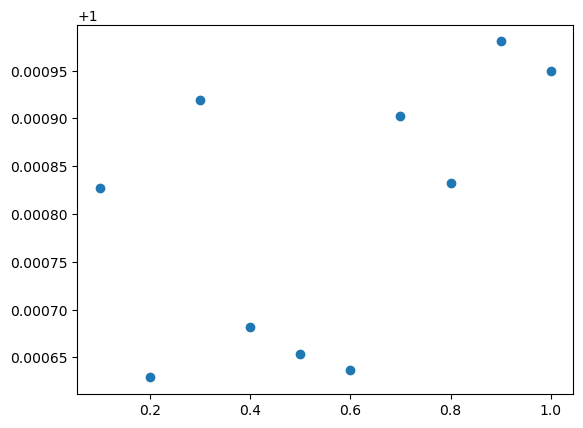

In [308]:
x = 1-np.arange(0,1,.1)
y = [i.cvar for i in ga_list]

#plot
plt.scatter(x,y)

In [287]:
ga_list[0].cvar

1.0009402619715921